In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('manufacturing.csv')
print(df.shape)
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

(3957, 6)


,temperature_(°c),pressure_(kpa),temperature_x_pressure,material_fusion_metric,material_transformation_metric,quality_rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [4]:
df.isna().sum()

temperature_(°c)                  0
pressure_(kpa)                    0
temperature_x_pressure            0
material_fusion_metric            0
material_transformation_metric    0
quality_rating                    0
dtype: int64

In [5]:
df.describe()

,temperature_(°c),pressure_(kpa),temperature_x_pressure,material_fusion_metric,material_transformation_metric,quality_rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


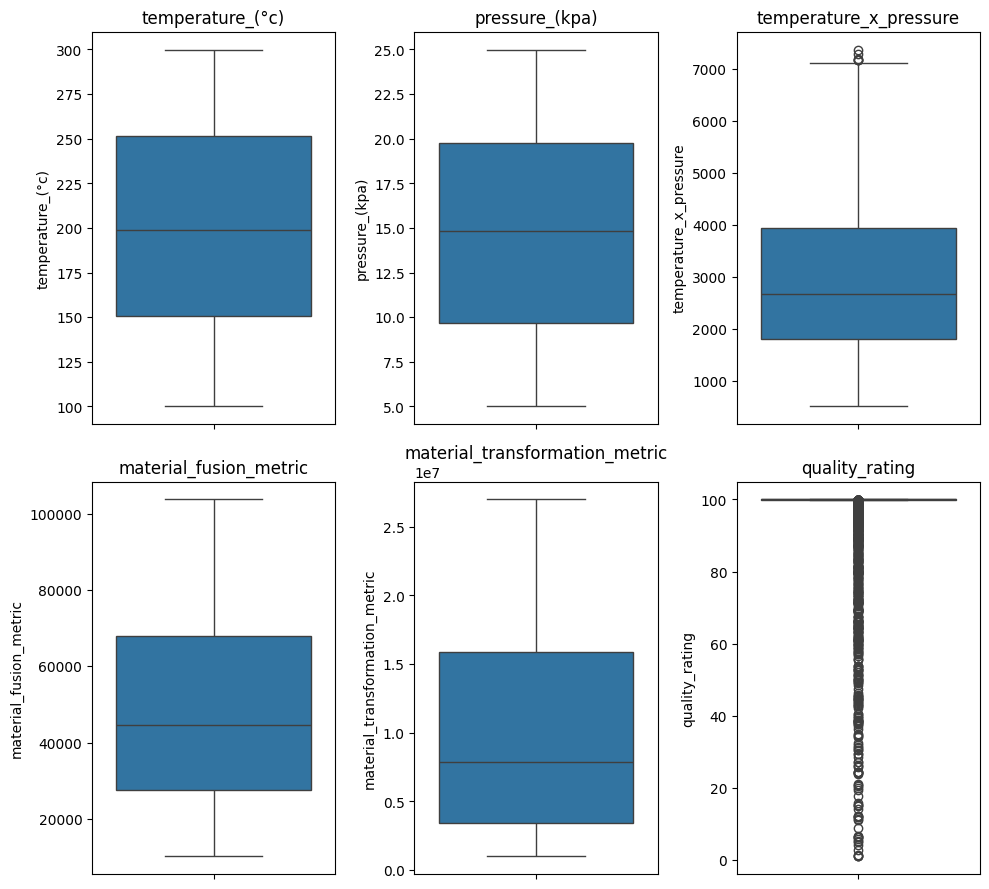

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 9))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

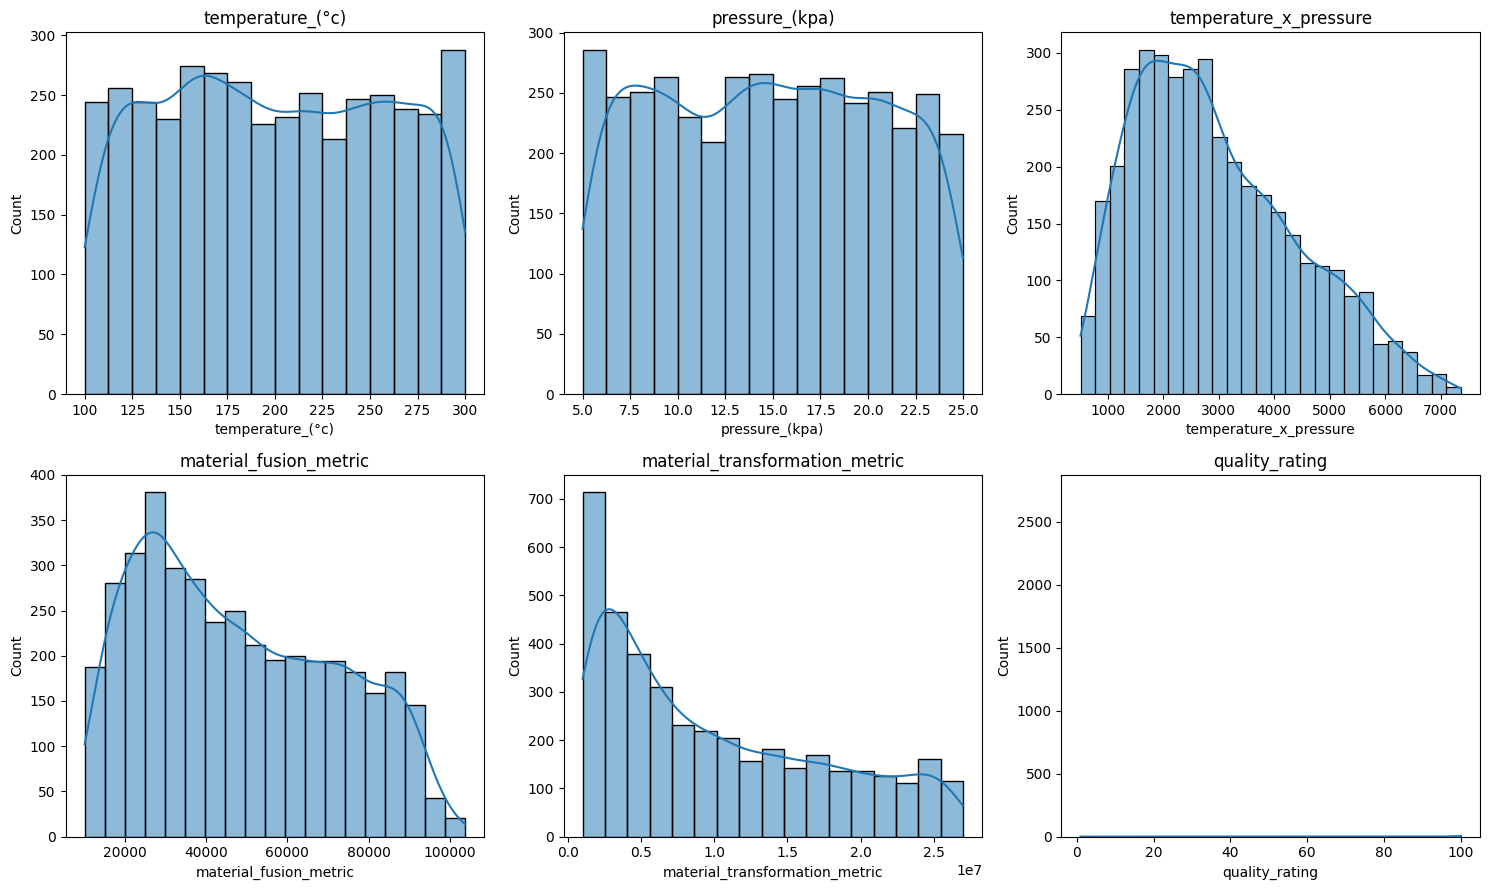

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

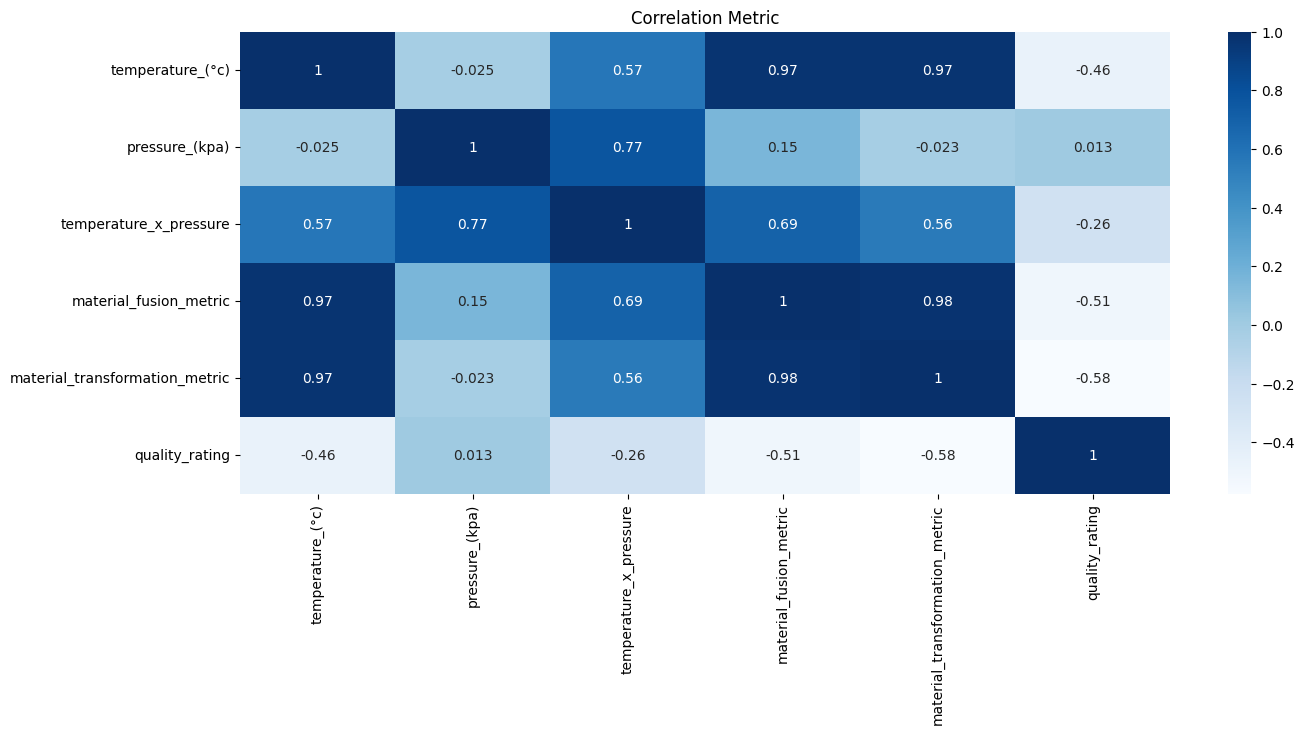

In [8]:
cm = df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Correlation Metric')
plt.show()

In [9]:
X = df.drop(['quality_rating', 'temperature_(°c)', 'pressure_(kpa)', 'material_fusion_metric'], axis=1)
y = df['quality_rating']

scaler = MinMaxScaler()
cols_to_scale = ['temperature_x_pressure', 'material_transformation_metric']
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variables'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

calculate_vif(X)

,Variables,VIF
0,temperature_x_pressure,3.405525
1,material_transformation_metric,3.405525


In [10]:
X.head()

,temperature_x_pressure,material_transformation_metric
0,0.171509,0.316550
1,0.485925,0.513712
2,0.177501,0.374201
3,0.650537,0.312555
4,0.350975,0.204011


In [11]:
degree = 6
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#### Training Model

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
train_score = lr_model.score(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
print(f'Test R2: {test_score}, Train R2: {train_score}, MSE: {mse}')

Test R2: 0.9989887716620047, Train R2: 0.9989346360467157, MSE: 0.20644287919492557


In [14]:
rg_model = Ridge(alpha=0.0001)
rg_model.fit(X_train, y_train)
test_score = rg_model.score(X_test, y_test)
train_score = rg_model.score(X_train, y_train)
y_pred_rg = rg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rg)
print(f'Test R2: {test_score}, Train R2: {train_score}, MSE: {mse}')

Test R2: 0.9963397128102459, Train R2: 0.9963113806313177, MSE: 0.7472498522254052


In [15]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
test_score = xgb_model.score(X_test, y_test)
train_score = xgb_model.score(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
print(f'Test R2: {test_score}, Train R2: {train_score}, MSE: {mse}')

Test R2: 0.9970852829379931, Train R2: 0.9999938385768284, MSE: 0.5950412579538141


In [16]:
X_test.shape

(792, 28)

#### Error Analysis

In [17]:
y_pred = xgb_model.predict(X_test)
residual = y_pred - y_test

residual_dict = {
    'Actual': y_test,
    'Predicted': y_pred,
    'Diff': residual,
    'Diff (%)': abs(residual * 100 / y_test)
}

residual_df = pd.DataFrame(residual_dict)
residual_df.head()

,Actual,Predicted,Diff,Diff (%)
149,4.052686,4.945755,0.893069,22.036469
1025,98.873036,98.865067,-0.007969,0.008060
2153,96.914933,96.991661,0.076729,0.079171
720,99.951543,99.939484,-0.012060,0.012065
325,99.999999,99.999809,-0.000190,0.000190


In [18]:
extreme_error = residual_df[residual_df['Diff (%)'] > 10]
extreme_error.shape

(13, 4)

In [19]:
X.shape

(3957, 2)

In [20]:
extreme_error.shape[0] * 100 / X.shape[0]

0.32853171594642405